In [31]:
import pandas as pd
import gymnasium as gym
from gymnasium.wrappers import FlattenObservation
# import gym
import pygame
from algorithms.rl import RL
from examples.test_env import TestEnv
from algorithms.planner import Planner
import itertools

# grid search
from examples.grid_search import GridSearch

In [32]:
gym.envs.registry.keys()

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0'])

In [33]:
lst_of_envs = list(gym.envs.registry.keys())
lst_of_envs

['CartPole-v0',
 'CartPole-v1',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Pendulum-v1',
 'Acrobot-v1',
 'phys2d/CartPole-v0',
 'phys2d/CartPole-v1',
 'phys2d/Pendulum-v0',
 'LunarLander-v2',
 'LunarLanderContinuous-v2',
 'BipedalWalker-v3',
 'BipedalWalkerHardcore-v3',
 'CarRacing-v2',
 'Blackjack-v1',
 'FrozenLake-v1',
 'FrozenLake8x8-v1',
 'CliffWalking-v0',
 'Taxi-v3',
 'tabular/Blackjack-v0',
 'tabular/CliffWalking-v0',
 'Reacher-v2',
 'Reacher-v4',
 'Pusher-v2',
 'Pusher-v4',
 'InvertedPendulum-v2',
 'InvertedPendulum-v4',
 'InvertedDoublePendulum-v2',
 'InvertedDoublePendulum-v4',
 'HalfCheetah-v2',
 'HalfCheetah-v3',
 'HalfCheetah-v4',
 'Hopper-v2',
 'Hopper-v3',
 'Hopper-v4',
 'Swimmer-v2',
 'Swimmer-v3',
 'Swimmer-v4',
 'Walker2d-v2',
 'Walker2d-v3',
 'Walker2d-v4',
 'Ant-v2',
 'Ant-v3',
 'Ant-v4',
 'Humanoid-v2',
 'Humanoid-v3',
 'Humanoid-v4',
 'HumanoidStandup-v2',
 'HumanoidStandup-v4',
 'GymV21Environment-v0',
 'GymV26Environment-v0']

In [31]:
# lst_of_envs.remove('phys2d/CartPole-v0')
# lst_of_envs.remove('phys2d/CartPole-v1')
# lst_of_envs.remove('phys2d/Pendulum-v0')
# lst_of_envs.remove('tabular/Blackjack-v0')
# lst_of_envs.remove('Reacher-v2')
# lst_of_envs.remove('Reacher-v4')

In [34]:
lst_env = ['CartPole-v0',
'CartPole-v1',
'MountainCar-v0',
'MountainCarContinuous-v0',
'Pendulum-v1',
'Acrobot-v1',
'LunarLander-v2',
'LunarLanderContinuous-v2',
'BipedalWalker-v3',
'BipedalWalkerHardcore-v3',
'CarRacing-v2',
'Blackjack-v1',
'FrozenLake-v1',
'FrozenLake8x8-v1',
'CliffWalking-v0',
'Taxi-v3',]

In [3]:
discrete_env_lst = ['Blackjack-v1',
 'FrozenLake-v1',
 'FrozenLake8x8-v1',
 'CliffWalking-v0',
 'Taxi-v3']

In [35]:
dict_of_env = {}
for env in lst_env:
    print(env)
    try:
        dict_of_env[env] = f'{gym.make(env).observation_space}'
    finally:
        pass

dict_of_env

CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v2
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3


c:\Users\lboad\py_venv\rl\lib\site-packages\gymnasium\envs\registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


{'CartPole-v0': 'Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)',
 'CartPole-v1': 'Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)',
 'MountainCar-v0': 'Box([-1.2  -0.07], [0.6  0.07], (2,), float32)',
 'MountainCarContinuous-v0': 'Box([-1.2  -0.07], [0.6  0.07], (2,), float32)',
 'Pendulum-v1': 'Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)',
 'Acrobot-v1': 'Box([ -1.        -1.        -1.        -1.       -12.566371 -28.274334], [ 1.        1.        1.        1.       12.566371 28.274334], (6,), float32)',
 'LunarLander-v2': 'Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.\n -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.\n 1.       ], (8,), float32)',
 'LunarLanderContinuous-v2': 'Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.

In [2]:
import gym
import pygame
from algorithms.rl import RL
from algorithms.planner import Planner
from examples.test_env import TestEnv


class Taxi:
    def __init__(self):
        self.env = gym.make('Taxi-v3', render_mode=None)


if __name__ == "__main__":

    taxi = Taxi()

    # VI/PI
    # V, V_track, pi = Planner(taxi.env.P).value_iteration()
    # V, V_track, pi = Planner(taxi.env.P).policy_iteration()

    # Q-learning
    Q, V, pi, Q_track, pi_track = RL(taxi.env).q_learning()

    test_scores = TestEnv.test_env(env=taxi.env, render=False, user_input=False, pi=pi)

test_scores

runtime = 8.81 seconds


array([10.,  3.,  5.,  6.,  5.,  7., 11.,  8.,  5., 11.])

In [20]:
# -*- coding: utf-8 -*-

import gym
import pygame
from algorithms.rl import RL
from algorithms.planner import Planner
from examples.test_env import TestEnv


class FrozenLake:
    def __init__(self):
        self.env = gym.make('FrozenLake8x8-v1', render_mode=None)


# if __name__ == "__main__":

frozen_lake = FrozenLake()

# VI/PI
# V, V_track, pi = Planner(frozen_lake.env.P).value_iteration()
# V, V_track, pi = Planner(frozen_lake.env.P).policy_iteration()

# Q-learning
# Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning()

test_scores = TestEnv.test_env(env=frozen_lake.env, render=False, user_input=False, pi=pi)

test_scores

runtime = 0.77 seconds


c:\Users\lboad\py_venv\rl\lib\site-packages\algorithms\planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

runtime = 5.09 seconds


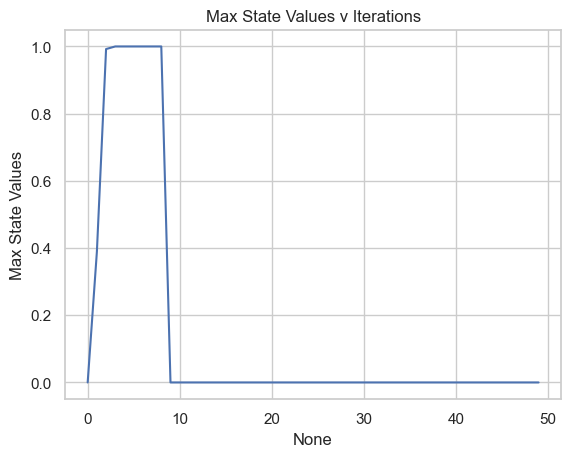

In [29]:
# -*- coding: utf-8 -*-
import math

import gym
import pygame
from algorithms.rl import RL
from algorithms.planner import Planner
from examples.test_env import TestEnv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import LinearSegmentedColormap


class Plots:
    @staticmethod
    def grid_world_policy_plot(data, label):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            data = np.around(np.array(data).reshape((8, 8)), 2)
            df = pd.DataFrame(data=data)
            my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
            cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
            ax = sns.heatmap(df, cmap=cmap, linewidths=1.0)
            colorbar = ax.collections[0].colorbar
            colorbar.set_ticks([.4, 1.1, 1.9, 2.6])
            colorbar.set_ticklabels(['Left', 'Down', 'Right', 'Up'])
            plt.title(label)
            plt.show()

    @staticmethod
    def grid_values_heat_map(data, label):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            data = np.around(np.array(data).reshape((8, 8)), 2)
            df = pd.DataFrame(data=data)
            sns.heatmap(df, annot=True).set_title(label)
            plt.show()

    @staticmethod
    def v_iters_plot(data, label):
        df = pd.DataFrame(data=data)
        df.columns = [label]
        sns.set_theme(style="whitegrid")
        title = label + " v Iterations"
        sns.lineplot(x=df.index, y=label, data=df).set_title(title)
        plt.show()

if __name__ == "__main__":
    frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)

    # VI/PI grid_world_policy_plot
    # V, V_track, pi = Planner(frozen_lake.env.P).value_iteration()
    # n_states = frozen_lake.env.observation_space.n
    # new_pi = list(map(lambda x: pi(x), range(n_states)))
    # s = int(math.sqrt(n_states))
    # Plots.grid_world_policy_plot(np.array(new_pi), "Grid World Policy")

    # Q-learning grid_world_policy_plot
    # Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning()
    # n_states = frozen_lake.env.observation_space.n
    # new_pi = list(map(lambda x: pi(x), range(n_states)))
    # s = int(math.sqrt(n_states))
    # Plots.grid_world_policy_plot(np.array(new_pi), "Grid World Policy")

    # Q-learning v_iters_plot
    # Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning()
    # max_q_value_per_iter = np.amax(np.amax(Q_track, axis=2), axis=1)
    # Plots.v_iters_plot(max_q_value_per_iter, "Max Q-Values")

    # VI/PI v_iters_plot
    # V, V_track, pi = Planner(frozen_lake.env.P).value_iteration()
    # V, V_track, pi = Planner(frozen_lake.env.P).policy_iteration()
    # max_value_per_iter = np.amax(V_track, axis=1)
    # Plots.v_iters_plot(max_value_per_iter, "Max State Values")

    # Q-learning grid_values_heat_map
    # Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning()
    # Plots.grid_values_heat_map(V, "State Values")

    # VI/PI grid_values_heat_map
    # V, V_track, pi = Planner(frozen_lake.env.P).value_iteration()
    # V, V_track, pi = Planner(frozen_lake.env.P).policy_iteration()
    # Plots.grid_values_heat_map(V, "State Values")

In [ ]:
def Q_learning_grid_search(env, epsilon_decay, iters):
    for i in itertools.product(epsilon_decay, iters):
        print("running q-learn -- with epsilon decay: ", i[0],  " iterations: ", i[1])
        Q, V, pi, Q_track, pi_track = RL(env).q_learning(epsilon_decay_ratio=i[0], n_episodes=i[1])

def sarsa_grid_search(env, epsilon_decay, iters):
    for i in itertools.product(epsilon_decay, iters):
        print("running sarsa -- with epsilon decay: ", i[0],  " iterations: ", i[1])
        Q, V, pi, Q_track, pi_track = RL(env).sarsa(epsilon_decay_ratio=i[0], n_episodes=i[1])

In [ ]:
epsilon_decay = [.4, .7, .9]
iters = [500, 5000, 50000]
grid_results = GridSearch.Q_learning_grid_search(frozen_lake.env, epsilon_decay, iters)

runtime = 5.39 seconds


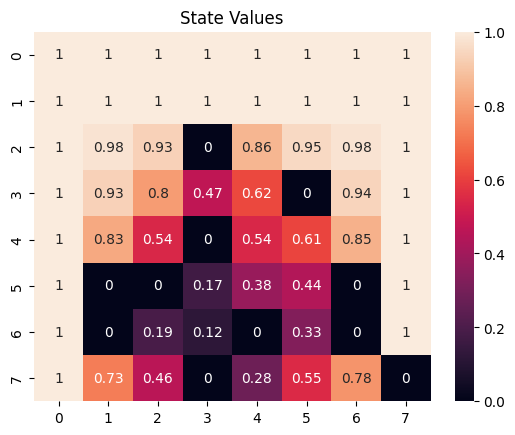

In [12]:
#plot state values
from examples.plots import Plots
frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
V, V_track, pi = Planner(frozen_lake.env.P).policy_iteration()
Plots.grid_values_heat_map(V, "State Values")

In [37]:
frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
type(frozen_lake.env.P)

c:\Users\lboad\py_venv\rl\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


dict

In [1]:
frozen_lake.env

NameError: name 'frozen_lake' is not defined